In [ ]:
# Importando Bibliotecas

In [ ]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Criando e visualisando DataFrame

In [ ]:
videogames = pd.read_csv('vgsales.csv')
videogames.head(10)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
videogames.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
videogames.dtypes # Tipos de dados de cada coluna

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [ ]:
videogames.shape #Quantidade de Linhas e Colunas no DataFrame

(16598, 11)

In [ ]:
videogames.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano', 'Gênero' # Renomeando Colunas
, 'Editora', 'Vendas América do Norte', 'Vendas EUA', 
'Vendas Japão', 'Outras vendas','Vendas Global']

In [ ]:
videogames.head(10)

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras vendas,Vendas Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [ ]:
col_quan = videogames.select_dtypes(exclude = ['object']).columns
col_qual = videogames.select_dtypes(include = ['object']).columns

In [ ]:
videogames_qual = videogames[col_qual]

In [ ]:
print("Número de valores únicos em cada variável qualitativa")
print(f"Todos:  {len(videogames)}")
for col in videogames_qual.columns:
    nb_unique = len(videogames[col].unique())
    print(f"{col[:4]}: {nb_unique}")

Número de valores únicos em cada variável qualitativa
Todos:  16598
Nome: 11493
Plat: 31
Gêne: 12
Edit: 579


In [ ]:
# Tratando valores Nulos
# Verificando Linhas onde não há ano de laçamento definido.
videogames[videogames['Ano'].isnull()].head() #

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras vendas,Vendas Global
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [ ]:
videogames['Gênero'].value_counts() # Verificando a quantidade de elementos por categoria(coluna).


Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Gênero, dtype: int64

In [ ]:
videogames['Plataforma'].value_counts()  # Verificando a quantidade de elementos por categoria(coluna)/ A função tbm é ultilzada para criar plot de forma rapida.



DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Plataforma, dtype: int64

In [ ]:
# Plotar informações/Analise DataFrame

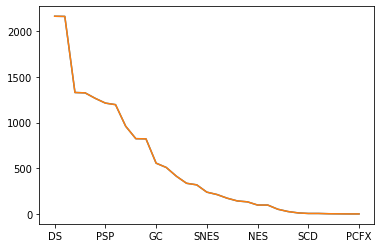

In [ ]:
titulos_lancados = videogames['Plataforma'].value_counts() #plotagem atraves da coluna Plataforma
titulos_lancados.plot()
videogames['Plataforma'].value_counts().plot()

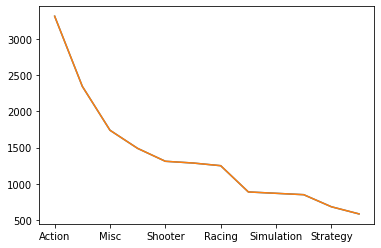

In [ ]:
titulos_lancados = videogames['Gênero'].value_counts() #plotagem atraves da coluna Gênero
titulos_lancados.plot()
videogames['Gênero'].value_counts().plot()

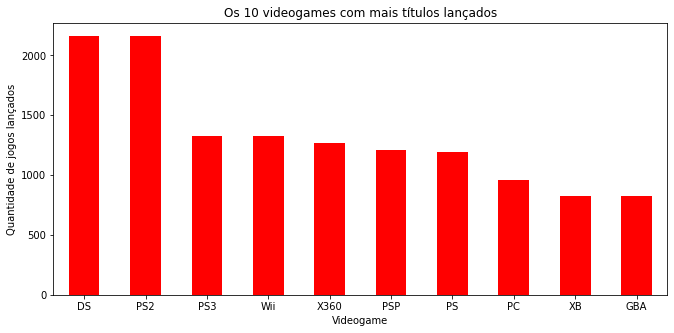

In [ ]:
# Criando um gráfico de barras.
videogames['Plataforma'].value_counts().head(10).plot(kind= 'bar', figsize=(11,5), grid = False, rot= 0 ,color = 'red')

#Agregando informações ao gráfico.
plt.title('Os 10 videogames com mais títulos lançados') # Inclui título ao gráfico
plt.xlabel('Videogame') # Nomeando o eixo 'X'( EM PÉ/VERTICAL)
plt.ylabel('Quantidade de jogos lançados')# Nomeando o eixo 'y'(DEITADO/HORIZONTAL)
plt.show() # Comando para exibir o gráfico

In [ ]:
videogames.head(5)

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras vendas,Vendas Global
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


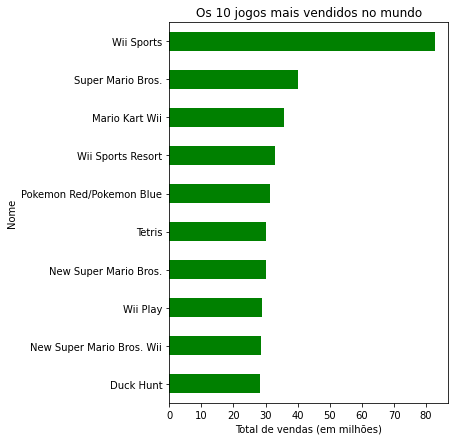

In [ ]:
#Modificando a plotagem


#set_index -- Setar o Index pela coluna:'Nome'
#sort_values -- Ordena as informações do DataFrame
#ascending -- Escolha de ordem 'decrescente'
#kind= 'barh' -- Escolhe o tipo de gráfico será plotado nesse caso barras na horizontal
#figsize -- Define o tamanho/dimensões do gráfico plotado
#grid -- Define se haverá ou não grades no gráfico
#color -- Define a cor que será usada
#legend --Define se as legendas irão ser mostradas no gráfico


top_10 = videogames[['Nome','Vendas Global']].head(10).set_index('Nome').sort_values('Vendas Global',ascending = True)
top_10.plot(kind= 'barh', figsize=(5,7), grid = False, color = 'green', legend = False)
plt.title('Os 10 jogos mais vendidos no mundo')
plt.xlabel('Total de vendas (em milhões)')
plt.show()

In [ ]:
#Criando uma nova Viualização
#Mapa de calor


In [ ]:
crosstab_vg = pd.crosstab(videogames['Plataforma'], videogames['Gênero']) # Foi criada uma tabela cruzada entre as colunas/features
crosstab_vg.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Plataforma,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,182,37,14,53,28,20,11,86,7,30,26,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,343,240,36,393,92,238,67,200,42,285,148,79


In [ ]:
# Adcionei uma noma coluna ao DataFrame somando seus respectivos valores
# sum(axis=1) cria a soma 
crosstab_vg['Total'] = crosstab_vg.sum(axis=1)

In [ ]:
crosstab_vg.head()

Gênero,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Total
Plataforma,,,,,,,,,,,,,
2600,61,2,2,5,9,11,6,0,24,1,12,0,133
3DO,0,1,0,0,0,1,0,0,0,1,0,0,3
3DS,182,37,14,53,28,20,11,86,7,30,26,15,509
DC,3,11,12,0,2,0,6,4,3,1,10,0,52
DS,343,240,36,393,92,238,67,200,42,285,148,79,2163


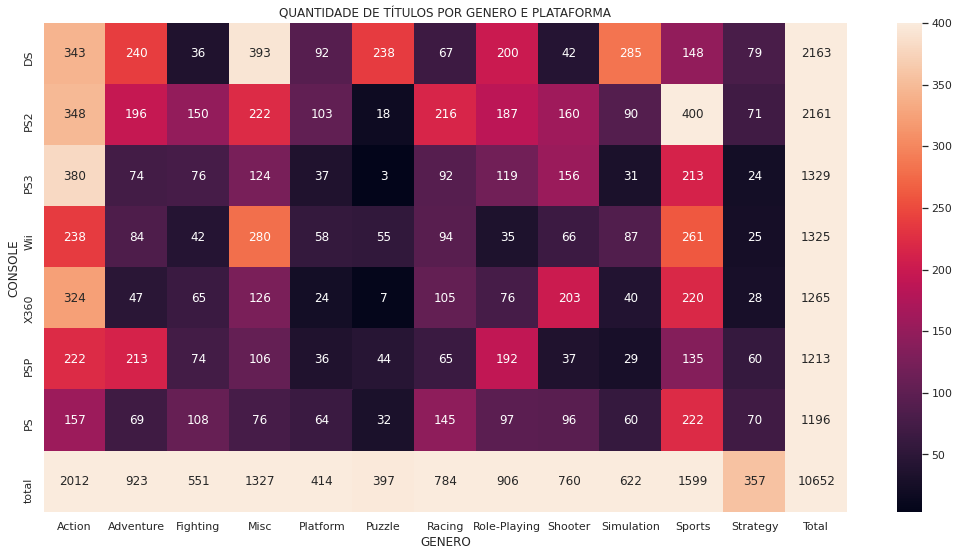

In [ ]:
top10_platforms = crosstab_vg[crosstab_vg['Total'] > 1000].sort_values('Total', ascending = False)
top10_final = top10_platforms.append(pd.DataFrame(top10_platforms.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=1)
plt.figure(figsize=(18, 9))
sns.heatmap(top10_final, annot=True, vmax=top10_final.loc[:'PS', :'Strategy'].values.max(), vmin=top10_final.loc[:, :'Strategy'].values.min(), fmt='d')
plt.title('QUANTIDADE DE TÍTULOS POR GENERO E PLATAFORMA')
plt.xlabel('GENERO')
plt.ylabel('CONSOLE')
plt.show()